# Wine Quality Analysis 

# On the data set

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):
   1. fixed acidity
   2. volatile acidity
   3. citric acid
   4. residual sugar
   5. chlorides
   6. free sulfur dioxide
   7. total sulfur dioxide
   8. density
   9. pH
   10. sulphates
   11. alcohol

Output variable (based on sensory data): 
   12. - quality (score between 0 and 10)


| Variable Name        | Role    | Type        | Description                                                                                               | Units   | Missing Values |
| -------------------- | ------- | ----------- | --------------------------------------------------------------------------------------------------------- | ------- | -------------- |
| fixed_acidity        | Feature | Continuous  | tartaric, malic, citric, and succinic; this variable is expressed in g(tartaricacid)/dm3 | g/dm^3  | no             |
| volatile_acidity     | Feature | Continuous  |                                                                                                           | g/dm^3  | no             |
| citric_acid          | Feature | Continuous  |                                                                                                           | g/dm^3  | no             |
| residual_sugar       | Feature | Continuous  |                                                                                                           | g/dm^3  | no             |
| chlorides            | Feature | Continuous  |                                                                                                           | g/dm^3  | no             |
| free_sulfur_dioxide  | Feature | Continuous  |                                                                                                           | mg/dm^3 | no             |
| total_sulfur_dioxide | Feature | Continuous  |                                                                                                           | mg/dm^3 | no             |
| density              | Feature | Continuous  |                                                                                                           | g/cm^3  | no             |
| pH                   | Feature | Continuous  |                                                                                                           | -       | no             |
| sulphates            | Feature | Continuous  |                                                                                                           | g/dm^3  | no             |
| alcohol              | Feature | Continuous  |                                                                                                           | vol.%   | no             |
| quality              | Target  | Integer     | score between 0 and 10                                                                                    | -       | no             |
| color                | Other   | Categorical | red or white                                                                                              | -       | no             |

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# config
pd.options.mode.copy_on_write = "warn"

# Import and build data frame

In [115]:
#TODO - When to keep data in two data frames? 
wine_r = pd.read_csv('data//wine+quality//winequality-red.csv', sep=';')
wine_w = pd.read_csv('data//wine+quality//winequality-white.csv', sep=';')

In [116]:
# setting color as categorical data
wine_color = pd.CategoricalDtype(
    ["red", "white"], ordered=False
)
# wine_r['color'] = wine_color.categories[0] # NOTE this will only set the string, ot the category
# wine_w['color'] = wine_color.categories[1]
wine_r['color'] = 'red'
wine_w['color'] = 'white'
wine_r.color = wine_r.color.astype(wine_color)
wine_w.color = wine_w.color.astype(wine_color)

In [117]:
wine_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  color                 1599 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 151.7 KB


In [118]:
wine_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4898 non-null   float64 
 1   volatile acidity      4898 non-null   float64 
 2   citric acid           4898 non-null   float64 
 3   residual sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free sulfur dioxide   4898 non-null   float64 
 6   total sulfur dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   int64   
 12  color                 4898 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


# Standardize

In [119]:
# set column titles
wine_r = wine_r.rename(columns=lambda x: x.replace(' ','_').lower())
wine_w = wine_w.rename(columns=lambda x: x.replace(' ','_').lower())

In [120]:
# set units if necessary!

# Analyse Whateve

## NaN values
There are no NaN values

In [121]:
wine_r.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [122]:
wine_w.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

## Duplicates

Duplicates are present, however, they do not need to be removed, because some wines just have the same set of values. They are distinguished by the index.

Why is the fraction of duplicates so high? 
- The high fraction of duplicates indicate that the attribute set is not really enough to distinguish between wines.
- Measurement accuracy might be too low.

In [123]:
dups_r = wine_r.duplicated(keep=False)
dups_w = wine_w.duplicated(keep=False)

# print('Overall duplicates', dups.sum(), dups.sum() / wine.shape[0])
print('Red wine duplicates', dups_r.sum(), dups_r.sum() / wine_r.shape[0])
print('White wine duplicates', dups_w.sum(), dups_w.sum() / wine_w.shape[0])

Red wine duplicates 460 0.2876797998749218
White wine duplicates 1709 0.34891792568395263


In [124]:
wine_r[wine_r.duplicated(keep=False)].sort_values(['fixed_acidity', 'volatile_acidity'])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
131,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5,red
132,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5,red
1488,5.6,0.540,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,6,red
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,red


## Features
 
 The following features are introduced:
- Quality Categories
- Free sulfur dioxide / Total sulfur dioxide -> aging? exposure to oxidation and spoilage

### Quality Categories

Can there be a common quality label for red and white?
- The chemical compositions as measured are very different. 
- 

In [125]:
# red
wine_r['quality_label'] = wine_r['quality'].apply(lambda value: 'low' 
                                                  if value <= 5 else 'medium'
                                                  if value <= 7 else 'high'
                                                  )

# transform into categorical type
wine_r['quality_label'] = pd.Categorical(wine_r['quality_label'], categories=['low', 'medium', 'high'])

In [126]:
# white
wine_w['quality_label'] = wine_w['quality'].apply(lambda value: 'low' 
                                                  if value <= 5 else 'medium'
                                                  if value <= 7 else 'high'
                                                  )

# transform into categorical type
wine_w['quality_label'] = pd.Categorical(wine_w['quality_label'], categories=['low', 'medium', 'high'])

In [132]:
# TODO where to put these lines? 

# reorder columns
cols_reordered = [
    'color', 
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'ph',
    'chlorides',
    'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates',
    'residual_sugar', 'density',
    'alcohol',
    'quality', 'quality_label'
    ]

wine_r = wine_r[cols_reordered]
wine_w = wine_w[cols_reordered]

## Combine Data sets

In [128]:
wine = pd.concat([wine_r, wine_w], axis=0)

In [129]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   color                 6497 non-null   category
 1   fixed_acidity         6497 non-null   float64 
 2   volatile_acidity      6497 non-null   float64 
 3   citric_acid           6497 non-null   float64 
 4   ph                    6497 non-null   float64 
 5   chlorides             6497 non-null   float64 
 6   free_sulfur_dioxide   6497 non-null   float64 
 7   total_sulfur_dioxide  6497 non-null   float64 
 8   sulphates             6497 non-null   float64 
 9   residual_sugar        6497 non-null   float64 
 10  density               6497 non-null   float64 
 11  alcohol               6497 non-null   float64 
 12  quality               6497 non-null   int64   
 13  quality_label         6497 non-null   category
dtypes: category(2), float64(11), int64(1)
memory usage: 672.8 KB


In [130]:
# count duplicates of data set
# NOTE does not work, because memory error! 
wine.groupby(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'color']).sum()

C:\Users\olive\AppData\Local\Temp\ipykernel_8788\965578125.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine.groupby(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',


TypeError: category type does not support sum operations

# EDA

In [133]:
wine_r.describe()

,fixed_acidity,volatile_acidity,citric_acid,ph,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,3.311113,0.087467,15.874922,46.467792,0.658149,2.538806,0.996747,10.422983,5.636023
std,1.741096,0.179060,0.194801,0.154386,0.047065,10.460157,32.895324,0.169507,1.409928,0.001887,1.065668,0.807569
min,4.600000,0.120000,0.000000,2.740000,0.012000,1.000000,6.000000,0.330000,0.900000,0.990070,8.400000,3.000000
25%,7.100000,0.390000,0.090000,3.210000,0.070000,7.000000,22.000000,0.550000,1.900000,0.995600,9.500000,5.000000
50%,7.900000,0.520000,0.260000,3.310000,0.079000,14.000000,38.000000,0.620000,2.200000,0.996750,10.200000,6.000000
75%,9.200000,0.640000,0.420000,3.400000,0.090000,21.000000,62.000000,0.730000,2.600000,0.997835,11.100000,6.000000
max,15.900000,1.580000,1.000000,4.010000,0.611000,72.000000,289.000000,2.000000,15.500000,1.003690,14.900000,8.000000


In [134]:
wine_w.describe()

,fixed_acidity,volatile_acidity,citric_acid,ph,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,3.188267,0.045772,35.308085,138.360657,0.489847,6.391415,0.994027,10.514267,5.877909
std,0.843868,0.100795,0.121020,0.151001,0.021848,17.007137,42.498065,0.114126,5.072058,0.002991,1.230621,0.885639
min,3.800000,0.080000,0.000000,2.720000,0.009000,2.000000,9.000000,0.220000,0.600000,0.987110,8.000000,3.000000
25%,6.300000,0.210000,0.270000,3.090000,0.036000,23.000000,108.000000,0.410000,1.700000,0.991723,9.500000,5.000000
50%,6.800000,0.260000,0.320000,3.180000,0.043000,34.000000,134.000000,0.470000,5.200000,0.993740,10.400000,6.000000
75%,7.300000,0.320000,0.390000,3.280000,0.050000,46.000000,167.000000,0.550000,9.900000,0.996100,11.400000,6.000000
max,14.200000,1.100000,1.660000,3.820000,0.346000,289.000000,440.000000,1.080000,65.800000,1.038980,14.200000,9.000000


## Primary Observations from describe
 - Acidity levels
   - The mean value of fixed, volatile acidity and pH seem to be higher in red wine.
   - Citric acidity is higher in white wines.
   - white wine is slightly lower in ph, i.e. more acidic, than red wine. 
 - chlorides are higher in red wines.
 - sulfur dioxide and sulphates
   - free and total sulfur dioxide is higher in white wines.
   - The mean value of sulphates seem to be higher in red wine compared to white wine.
 - residual sugar is higher in white wines, but it also varies quite strongly.
 - Density is similar.
 - alcohol content is similar in red and white wine.
 - quality rating is similar, there is one exceptional white wine.

In [107]:
wine_r.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'color', 'quality_label'],
      dtype='object')

# Figures

In [152]:
# plot configs
# TODO how to transfer the config efficiently to the figures?
color_red = 'red'
color_white = 'gray'

## Quantities

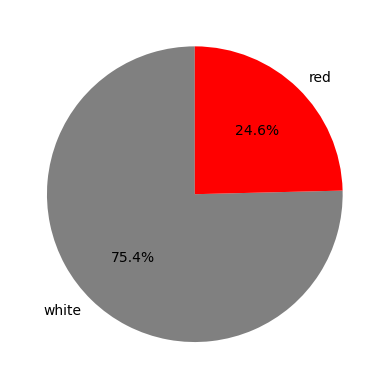

In [153]:
wine_types_count = wine.color.value_counts()

fig, ax = plt.subplots()
ax.pie(
    wine_types_count.values, labels=wine_types_count.index, colors=[color_white, color_red],
    autopct='%1.1f%%', startangle=90
    );

## Quality Label distribution

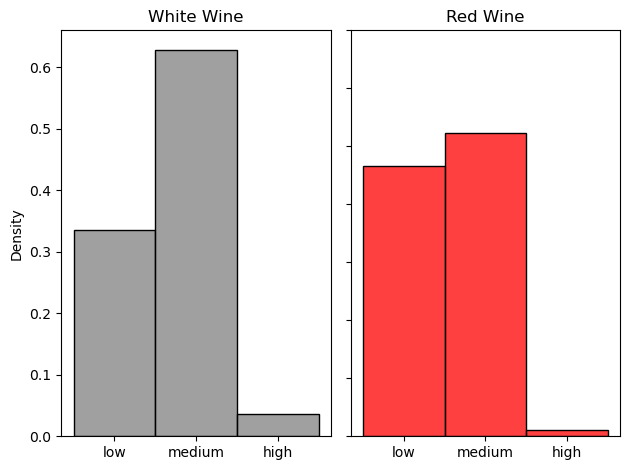

In [170]:
fig, ax = plt.subplots(1,2)

sns.histplot(wine_w.quality_label, ax=ax[0], color=color_white, stat="density") # NOTE stat = density for normalization
sns.histplot(wine_r.quality_label, ax=ax[1], color=color_red, stat="density")

ax[0].set_title('White Wine')
ax[0].set_xlabel('')

ax[1].set_title('Red Wine')
ax[1].set_xlabel('')
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_ylabel('')
ax[1].set_yticks(ax[0].get_yticks(), labels=[])

plt.tight_layout()

# Some values for data analysis

In [ ]:
quantities = ['volatile_acidity', 'total_sulfur_dioxide']
countries = ['US', 'EU', 'AUS']

legal_limits = pd.DataFrame(index=pd.MultiIndex.from_product([quantities, wine_color.categories, countries]), columns=['limit', 'limit_type'])

# U.S, the legal limits of Volatile Acidity
legal_limits.loc[('volatile_acidity', 'white', 'US'),:] = [1.1, 'upper']
legal_limits.loc[('volatile_acidity', 'red', 'US'),:] = [1.2, 'upper']

# in the EU, red wines can only have 160mg/L, 
# while white and rose wines can have about 210mg/L. 
# Sweet wines are allowed to have 400mg/L. 
# Legal limits are set at 350mg/L for the USA, 
# and 250mg/L for Australia.
legal_limits.loc[('total_sulfur_dioxide', 'white', 'EU'),:] = 210
legal_limits.loc[('total_sulfur_dioxide', 'red', 'EU'),:] = 160
legal_limits.loc[('total_sulfur_dioxide', 'white', 'US'),:] = 350
legal_limits.loc[('total_sulfur_dioxide', 'red', 'US'),:] = 350
legal_limits.loc[('total_sulfur_dioxide', 'white', 'EU'),:] = 250
legal_limits.loc[('total_sulfur_dioxide', 'red', 'EU'),:] = 250

legal_limits


C:\Users\olive\AppData\Local\Temp\ipykernel_8788\2749995893.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  legal_limits.loc[('volatile_acidity', 'white', 'US'),:] = [1.2, 'upper']
C:\Users\olive\AppData\Local\Temp\ipykernel_8788\2749995893.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  legal_limits.loc[('volatile_acidity', 'red', 'US'),:] = [1.2, 'upper']


limit limit_type
volatile_acidity     red   US    1.2      upper
                           EU    NaN        NaN
                           AUS   NaN        NaN
                     white US    1.2      upper
                           EU    NaN        NaN
                           AUS   NaN        NaN
total_sulfur_dioxide red   US    NaN        NaN
                           EU    NaN        NaN
                           AUS   NaN        NaN
                     white US    NaN        NaN
                           EU    NaN        NaN
                           AUS   NaN        NaN

# Questions

## On the data set 
- Who rated the wines? wine experts graded the wine quality between 0 (very bad) and 10 (excellent)
- Measurement accuracy? 

## Data exploration
- Box Plots for all columns: how do red and white wine compare?
- Correlation plots: See 

## For data analysis
- How strong is the correlation between ...
  - density and residual sugar? expectation: strong
- What's a quality wine? How do the quantities relate:
  - quality and residual sugar? expectation: strong
  - Sulphates and quality? hypthesis: additives lower the quality 
  - Volatile acidity and quality? hypthesis: additives lower the quality 
- Wines with low ph and high citric and fixed acidity should have high concentrations of other acids not measured here 